In [1]:
import numpy as np
np.__version__

'2.3.1'

In [2]:
calificaciones = np.array([7, 6, 9, 8, 8, 5, 7])
calificaciones

array([7, 6, 9, 8, 8, 5, 7])

In [3]:
import matplotlib
matplotlib.__version__

'3.10.3'

In [4]:
import matplotlib.pyplot as plt

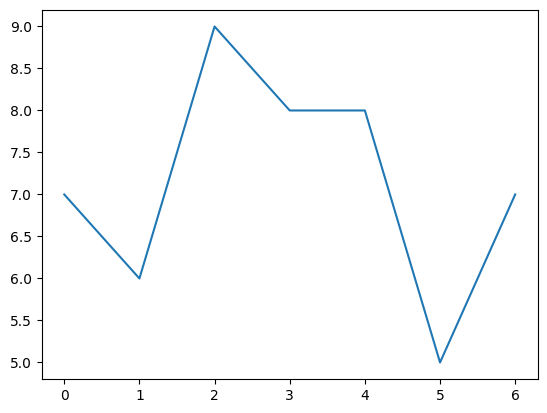

In [5]:
plt.plot(calificaciones)

In [6]:
import pandas as pd
pd.__version__

'2.3.0'

In [7]:
# repo con datasets: https://github.com/mwaskom/seaborn-data
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/refs/heads/master/tips.csv', encoding='utf-8')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [8]:
df['total_bill'].mean()

np.float64(19.78594262295082)

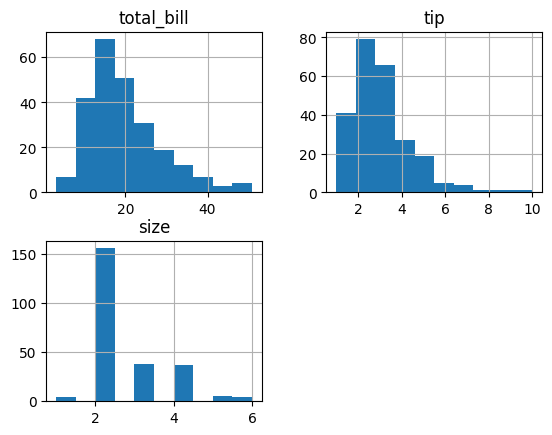

In [9]:
df.hist();

<Axes: >

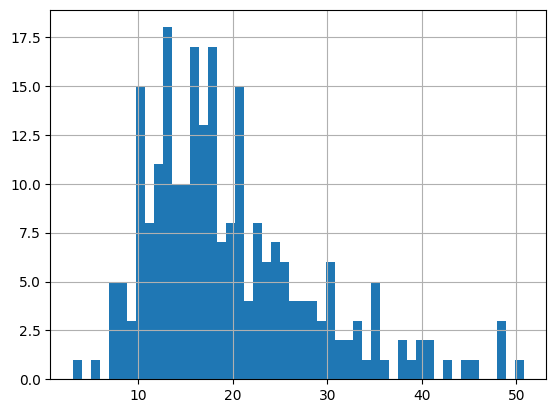

In [10]:
df['total_bill'].hist(bins=50)

<Axes: ylabel='Density'>

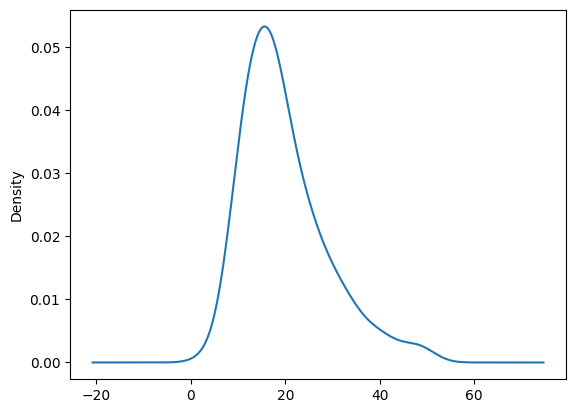

In [13]:
df['total_bill'].plot.density()

Text(0.5, 1.0, 'Distribución del gasto total_bill por smoker')

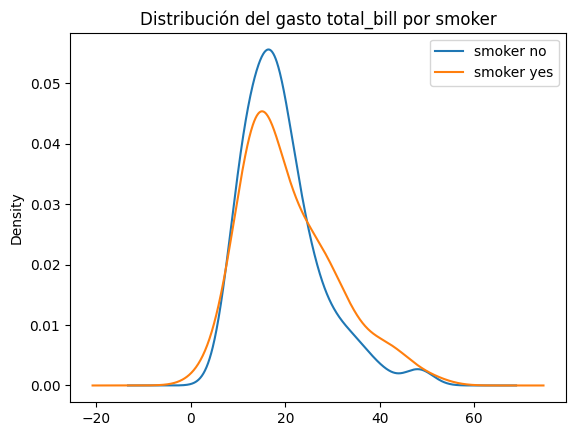

In [25]:
df[df['smoker'] == 'No']['total_bill'].plot.kde(label='smoker no')
df[df['smoker'] == 'Yes']['total_bill'].plot.kde(label='smoker yes')
plt.legend()
plt.title('Distribución del gasto total_bill por smoker')